In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
base_dados = pd.ExcelFile("Base_de_Dados.xlsx")
dados_selecionados = pd.read_excel(base_dados, "Dados_SNIS_Norte_selecionados")
projecao_populacional = pd.read_excel(base_dados, "Projecao_Pop_Geo")
#dados_selecionados.head() #verify
#projecao_populacional.head() #verify 


In [12]:
                                                            # tratamento dos dados selecionados
#dados_selecionados.columns
#dados_selecionados.shap
dados_selecionados.describe()


,Código do Município,Ano de Referência,POP_TOT - População total do município do ano de referência (Fonte: IBGE):,POP_URB - População urbana do município do ano de referência (Fonte: IBGE):,AG001 - População total atendida com abastecimento de água,AG026 - População urbana atendida com abastecimento de água,IN023_AE - Índice de atendimento urbano de água,IN055_AE - Índice de atendimento total de água
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,313974.723684,2013.500000,20429.741541,14293.860902,14004.211466,13836.985902,94.962218,54.398976
std,1863.242384,4.033025,44600.338527,42263.560519,40586.811248,40540.433318,8.135646,19.646263
min,310100.000000,2007.000000,2932.000000,842.000000,961.000000,961.000000,50.600000,17.190000
25%,312716.250000,2010.000000,6075.500000,2654.500000,2672.250000,2622.250000,90.575000,39.050000
50%,313899.000000,2013.500000,8848.000000,5135.500000,4808.000000,4637.500000,100.000000,53.820000
75%,315477.500000,2017.000000,19628.750000,10963.750000,10640.500000,10640.500000,100.000000,66.977500
max,317103.000000,2020.000000,413487.000000,393507.000000,373816.000000,373816.000000,100.000000,100.000000


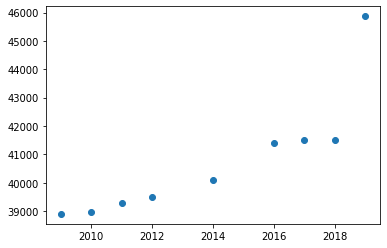

[[-9.93259815e+05  5.13425926e+02]]


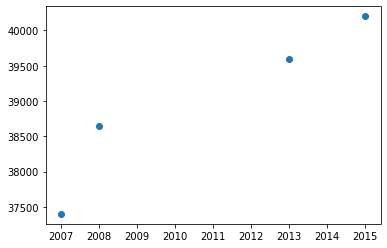

[[43860.55555556]]


ValueError: x and y must have same first dimension, but have shapes (4, 1) and (13, 1)

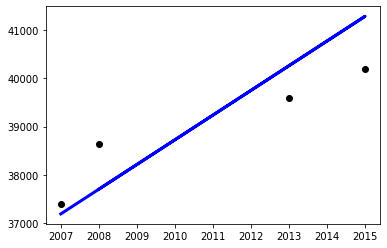

In [203]:

from numpy import poly1d
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                   ('linear', LinearRegression(fit_intercept=False))])

pop = np.array([44657,46306,46624,46654,46950,47236,48974,49293,49600,49891,50168,49942,49979]) #bocaiuvas
iu = np.array([83.75,83.46,83.43,83.49,83.71,83.62,80.86,81.35,81.05,82.98,82.72,83.1,91.78])
pop_tot_atd = np.array([37400,38646,38900,38950,39300,39500,39600,40100,40200,41400,41500,41500,45870])
pop_urb_total = np.array([34999,36291,36541,36600,36832,37057,38420,38670,38911,39139,39357,39179,39208])
pop_urb_atd = np.array([35000,36246,36500,36500,36800,37000,38000,38400,38800,39100,39200,39100,39150]) #bocaiuvas
ano = np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

x = ano.reshape(-1,1)
y = pop_tot_atd.reshape(-1,1)


x_train, x_test, y_train, y_test = train_test_split(x, y)

plt.scatter(x_train,y_train)
plt.show()

model = model.fit(x_train, y_train)
coef = model.named_steps['linear'].coef_


model = model.fit(x_train, y_train)
print(coef)
plt.scatter(x_test,y_test)
plt.show()

ano = np.array([2020])
ano = ano.reshape(1,-1)

print(model.predict(ano))

plt.plot(x_test, model.predict(x_test), color='blue', linewidth=3)


plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y, color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()